# links

### https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-facebooks-prophet-model-9ee1657132b5

In [5]:
! pip install fbprophet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('NOC.csv',usecols=['Open','High','Low','Close','Date'])
# df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
# df.set_index('Date',inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2769 non-null   object 
 1   Open    2769 non-null   float64
 2   High    2769 non-null   float64
 3   Low     2769 non-null   float64
 4   Close   2769 non-null   float64
dtypes: float64(4), object(1)
memory usage: 108.3+ KB
None


,Date,Open,High,Low,Close
0,2010-01-04,50.686352,51.382046,50.686352,51.363976
1,2010-01-05,51.228451,51.906075,51.228451,51.454327
2,2010-01-06,51.318802,51.698269,51.129066,51.653095
3,2010-01-07,51.427219,52.366859,51.246521,52.186161
4,2010-01-08,51.833794,52.493351,51.635025,51.897041


In [3]:
df.describe()

,Open,High,Low,Close
count,2769.000000,2769.000000,2769.000000,2769.000000
mean,181.252642,182.904999,179.537227,181.264758
std,107.235036,108.329353,105.990721,107.157784
min,48.798035,49.231716,48.337250,48.879349
25%,66.559998,67.000000,66.010002,66.550003
50%,164.889999,165.979996,163.679993,165.050003
75%,287.790009,290.450012,285.149994,287.500000
max,384.679993,385.010010,380.200012,384.869995


In [6]:
data = df[['Date','Close']]
data.rename(columns={'Date':'ds','Close':'y'},inplace=True)
m = Prophet(daily_seasonality = True) 
m.fit(data) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


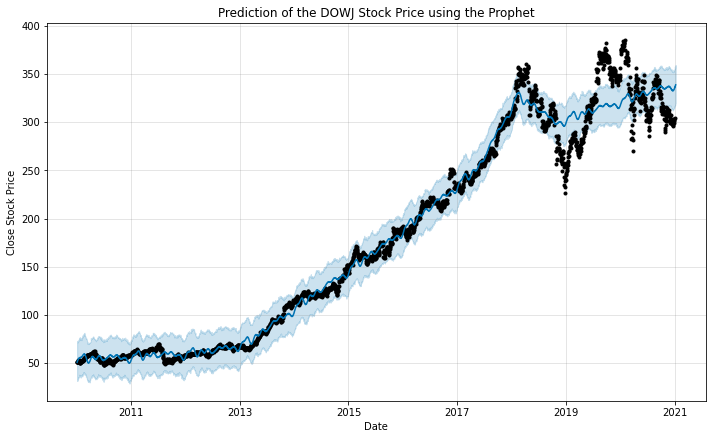

In [9]:
future = m.make_future_dataframe(periods=7) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the DOWJ Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()